<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Assignment6/Assignment6_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

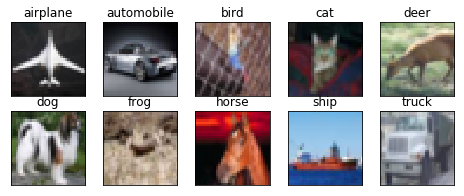

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 12s 32ms/step - loss: 1.8530 - acc: 0.2941 - val_loss: 1.4587 - val_acc: 0.4623

Epoch 00001: val_acc improved from -inf to 0.46230, saving model to assignment6_model_A-1.h5
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3534 - acc: 0.5101 - val_loss: 1.1250 - val_acc: 0.5927

Epoch 00002: val_acc improved from 0.46230 to 0.59270, saving model to assignment6_model_A-1.h5
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1262 - acc: 0.6025 - val_loss: 0.9817 - val_acc: 0.6467

Epoch 00003: val_acc improved from 0.59270 to 0.64670, saving model to assignment6_model_A-1.h5
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9828 - acc: 0.6554 - val_loss: 0.8724 - val_acc: 0.6916

Epoch 00004: val_acc improved from 0.64670 to 0.69160, saving model to assignment6_model_A-1.h5
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.

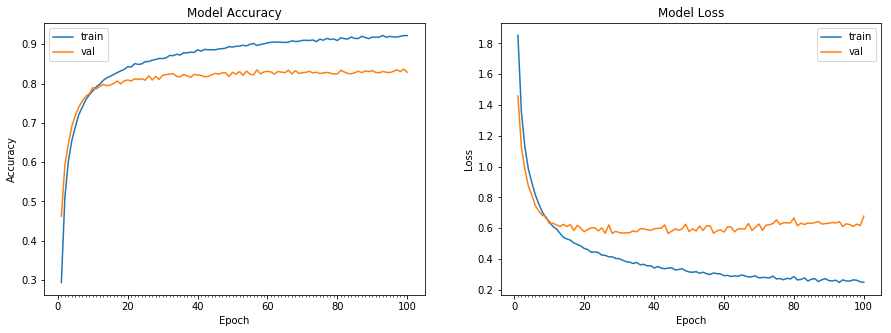

Accuracy on test data is: 83.69


In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)
checkpointer = ModelCheckpoint(filepath='assignment6_model_A-1.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
# Load the weights with the best validation accuracy:
model.load_weights('assignment6_model_A-1.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# New Model

In [10]:
# Define the model
new_model = Sequential()
new_model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
new_model.add(Activation('relu'))#32
new_model.add(BatchNormalization())
new_model.add(Dropout(0.4))

new_model.add(Convolution2D(48, 3, 3))
new_model.add(Activation('relu'))#30
new_model.add(BatchNormalization())
new_model.add(Dropout(0.4))

new_model.add(MaxPooling2D(pool_size=(2, 2)))#15
new_model.add(Convolution2D(96, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#15
new_model.add(BatchNormalization())
new_model.add(Dropout(0.4))

new_model.add(Convolution2D(96, 3, 3))
new_model.add(Activation('relu'))#13

new_model.add(MaxPooling2D(pool_size=(2, 2)))#6

new_model.add(Convolution2D(192, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#6
new_model.add(BatchNormalization())
new_model.add(Dropout(0.4))

new_model.add(Convolution2D(192, 3, 3))
new_model.add(Activation('relu'))#4x4x128
new_model.add(BatchNormalization())
new_model.add(Dropout(0.4))

new_model.add(Convolution2D(96, 1, 1, activation='relu')) #4x4x64
new_model.add(BatchNormalization())
new_model.add(Dropout(0.4))

new_model.add(Convolution2D(num_classes, 4, 4))
new_model.add(Flatten())
new_model.add(Activation('softmax'))

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python

In [11]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=75)`
  app.launch_new_instance()


Epoch 1/75
390/390 [==============================] - 16s 41ms/step - loss: 1.8751 - acc: 0.3708 - val_loss: 1.9206 - val_acc: 0.4030

Epoch 00001: val_acc improved from -inf to 0.40300, saving model to assignment6_model_A-2.h5
Epoch 2/75
390/390 [==============================] - 15s 37ms/step - loss: 1.3680 - acc: 0.5319 - val_loss: 1.3330 - val_acc: 0.5635

Epoch 00002: val_acc improved from 0.40300 to 0.56350, saving model to assignment6_model_A-2.h5
Epoch 3/75
390/390 [==============================] - 15s 37ms/step - loss: 1.1374 - acc: 0.6029 - val_loss: 1.7261 - val_acc: 0.5228

Epoch 00003: val_acc did not improve from 0.56350
Epoch 4/75
390/390 [==============================] - 15s 37ms/step - loss: 0.9637 - acc: 0.6611 - val_loss: 2.1354 - val_acc: 0.5601

Epoch 00004: val_acc did not improve from 0.56350
Epoch 5/75
390/390 [==============================] - 15s 37ms/step - loss: 0.8533 - acc: 0.6980 - val_loss: 1.2847 - val_acc: 0.6421

Epoch 00005: val_acc improved from 0

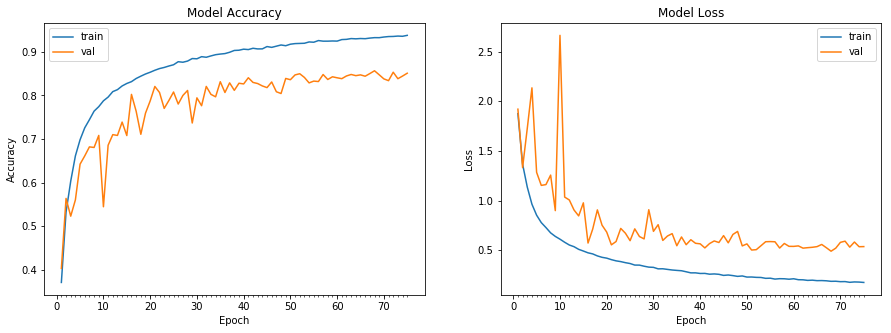

Accuracy on test data is: 85.63


In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

checkpointer = ModelCheckpoint(filepath='assignment6_model_A-2.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')


# train the model
start = time.time()
# Train the model
new_model_info = new_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(new_model_info)
# compute test accuracy
# Load the weights with the best validation accuracy:
new_model.load_weights('assignment6_model_A-2.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, new_model))

#### The old model accuracy was: 83.69, and the new model accuracy is 85.63

